# <center> MUR postprocessing and Cartopy

## Data

- The sst_mur datafiles were not postprocessed into proper netCDF form (with CF conventions).  See [notes on MUR](https://github.com/mas300labs-uofsa/tops-hurricane-sally/blob/main/2.c.MURsst.md) for the nco commands to properly post-process the data.
- Try never to make an extra array if you don't have to, especially for a large dataset.
- Try to preserve metadata, in this case units.

My sample data set is from Hurricane Sally.  When I add documentation for MUR, you can test them by trying to get the equivalent dataset for Katrina.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
#This is from 'Hurricane Sally'
ds = xr.open_dataset('20200915-SST.nc') #load
#In MUR, the variable folks are expecting is 'analysed_sst'.
#CF conventions are time,lat,lon
ds 

<xarray.Dataset>
Dimensions:       (time: 1, lat: 1001, lon: 1501)
Coordinates:
  * lat           (lat) float32 24.0 24.01 24.02 24.03 ... 33.98 33.99 34.0
  * lon           (lon) float32 -93.0 -92.99 -92.98 ... -78.02 -78.01 -78.0
  * time          (time) datetime64[ns] 2020-09-15T09:00:00
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    Fri Jul  7 18:39:42 2023: ncks -v analysed_ss...
    ...                         ...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid
    NCO:                        netCDF Operators version 5.1.4 (Homepage = ht...

In [14]:
#Just subtract. 
sst = ds.analysed_sst - 273.15
#Keep the metadata up to date
sst.attrs = ds.analysed_sst.attrs
sst.attrs["units"] = "deg C"

## Mapping

Basemap is from Python 2, which is deprecated, and that's why installing it required a kernal restart...your default environment was Python 3 (which you want), but by installing Basemap, you force it to make a new environment with Python 2.  

Anyway, use Cartopy instead.

Note, I already limited the spatial extent with [nco](https://nco.sourceforge.net):
```
ncks -v analysed_sst -d lon,-93.,-78. -d lat,24.,34. 20200915090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc 20200915-SST.nc
```

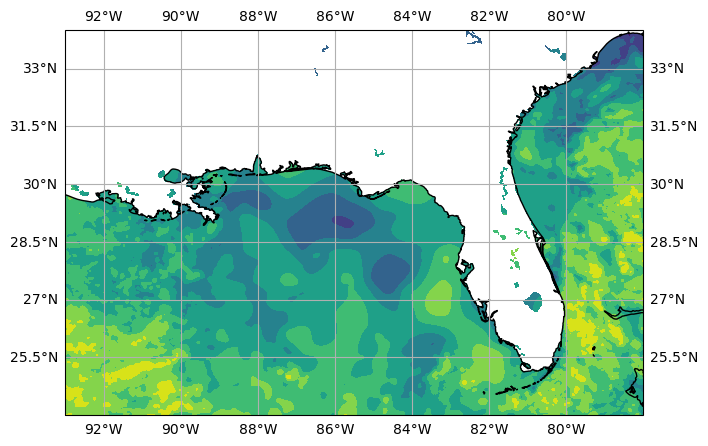

In [19]:
#Plot
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(ds.lon, ds.lat, sst[0,:,:],
             transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()